# Data augmentation analysis

## Data import

Load data from OpenML

In [1]:
from utils import data_import, data_augmentation

In [2]:
import imageio
import numpy as np
from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
selected_class = '4'
image_size = (28,28)
proportion = 0.2
aug_type = "rotate"

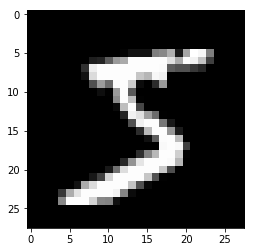

In [4]:
image = np.resize(X[0], image_size)
plt.imshow(image, cmap='gray')
plt.show()

Generate balanced dictionary from the fetched data

In [5]:
d_balanced = data_import.generate_balanced_dictionary(X,y)
d_balanced, d_test = data_import.train_test_split_dictionary(d_balanced)

Generate unbalanced dictionary by reducing the `selected_class` examples to its `proportion`.

In [6]:
d_unbalanced, _ = data_import.reduce_class_samples(d_balanced, 
                                                label_key=selected_class, 
                                                proportion=proportion)

Label sample distribution in the unbalanced data

In [7]:
X1, y1 = data_import.lists_from_dict(d_unbalanced)
unique, counts = np.unique(y1, return_counts=True)
print(unique)
print(counts)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
[5051 5051 5051 5051 1010 5051 5051 5051 5051 5051]


## Data augmentation

Generate augmentation with [Augmentor](https://github.com/mdbloice/Augmentor). We have to save the selected images to file (PNG lossless) and load back the augmented images

In [8]:
data_augmentation.remove_directory("augment/")

In [9]:
data_augmentation.save_label_to_file(d_unbalanced,selected_class,image_size)

1010

The number of required new images is the difference between the balanced and the unbalanced

In [10]:
missing_image_num = len(d_balanced[selected_class]) - len(d_unbalanced[selected_class])

In [11]:
data_augmentation.generate_augmented_data(missing_image_num, aug_type)

Executing Pipeline:   0%|          | 0/4041 [00:00<?, ? Samples/s]

Initialised with 1010 image(s) found.
Output directory set to augment/input/../output/rotate/.

Processing <PIL.Image.Image image mode=L size=28x28 at 0x7FC43050AC90>: 100%|██████████| 4041/4041 [00:18<00:00, 224.08 Samples/s]


In [12]:
d_augmented= data_augmentation.load_augmented_data(d_unbalanced, selected_class, aug_type)

In [13]:
X2, y2 = data_import.lists_from_dict(d_augmented)
unique, counts = np.unique(y2, return_counts=True)
print(unique)
print(counts)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
[5051 5051 5051 5051 5051 5051 5051 5051 5051 5051]


In [14]:
X_test_selected_class = d_test.pop(selected_class, None)
y_test_selected_class = [selected_class]*len(X_test_selected_class)

In [15]:
X_test, y_test = data_import.lists_from_dict(d_test)
unique, counts = np.unique(y_test, return_counts=True)
print(unique)
print(counts)

['0' '1' '2' '3' '5' '6' '7' '8' '9']
[1262 1262 1262 1262 1262 1262 1262 1262 1262]
